In [34]:
# Importamos las librerías que usaremos a lo largo de esta presentación
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Leemos los datos que usaremos a lo largo de esta presentación
temperature =  pd.read_csv("temperature.csv")
taxi =  pd.read_csv("taxi.csv")

# Conversión de grados Celsius a Fahrenheit

In [6]:
# Separamos las características de la variable objetivo
X = temperature.drop("Fahrenheit", axis = 1).values
y = temperature["Fahrenheit"].values

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60, random_state = 12345)

# Creamos un modelo donde Fahrenheit es la variable dependiente y Celsius, la independiente​
model = LinearRegression().fit(X_train, y_train)

# Visualizamos el modelo
print(model.intercept_, model.coef_)

32.0 [1.8]


Text(0, 0.5, 'Fahrenheit')

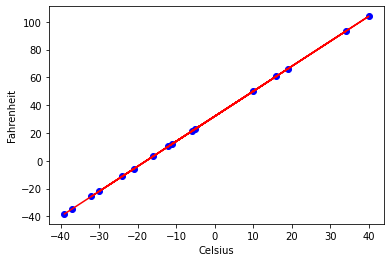

In [7]:
# Realizamos la predicción de la variable objetivo usando los mismos datos con los que se entrenó el modelo
prediction = model.predict(X_test)

# Graficamos los valores reales contra la predicción
plt.scatter(X_test, y_test, color = "b") 
plt.plot(X_test, prediction, color = "r")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")

# Cálculo del costo del viaje en taxi

In [8]:
taxi.head()

,Distance,Time,Cost
0,31018,5393,270.163666
1,35018,3648,245.729088
2,25344,3385,198.586056
3,27826,4412,233.611110
4,9463,538,62.933615


In [14]:
# Separamos las características de la variable objetivo
X = taxi.drop(["Time", "Cost"], axis = 1).values
y = taxi["Cost"].values

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60, random_state = 54321)

# Creamos un modelo donde Cost es la variable dependiente y Distance, la independiente
model = LinearRegression().fit(X_train, y_train)

# Visualizamos el modelo
print(model.intercept_, model.coef_)

86.59879123867697 [0.00381115]


In [15]:
# Separamos las características de la variable objetivo
X = taxi.drop(["Distance", "Cost"], axis = 1).values
y = taxi["Cost"].values

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60, random_state = 54321)

# Creamos un modelo donde Cost es la variable dependiente y Time, la independiente
model = LinearRegression().fit(X_train, y_train)

# Visualizamos el modelo
print(model.intercept_, model.coef_)

138.09899740174754 [0.0148634]


In [35]:
# Separamos las características de la variable objetivo
X = taxi.drop("Cost", axis = 1).values
y = taxi["Cost"].values

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.60, random_state = 54321)

# Creamos un modelo donde Cost es la variable dependiente y Distance y Time, las independiente​s
model = LinearRegression().fit(X_train, y_train)

# Visualizamos el modelo
print(model.intercept_, model.coef_)

9.572406351450354 [0.00427423 0.02372308]


# Evaluación del desempeño

In [39]:
# Realizamos la predicción del costo usando los datos del conjunto de prueba
prediction = model.predict(X_test)

# Calculamos el error medio cuadrado
mean_squared_error(y_test, prediction)

0.067793942001573

# Selección de características

In [32]:
# Creamos un modelo donde Cost es la variable dependiente y Distance y Time, las independiente​s
# En esta ocasión usamos Ordinary Least Squares para generar el modelo
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Visualizamos los detalles del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.429e+06
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           6.13e-80
Time:                        01:01:32   Log-Likelihood:                 3.3037
No. Observations:                  35   AIC:                           -0.6074
Df Residuals:                      32   BIC:                             4.059
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5724      0.117     82.132      0.0